# Practice - Basic Bayes

**Disclaimer:** This document is a homework assignment for Johns Hopkins University course EN.553.636. It is intended solely for educational purposes.

# 1 Bayes Rule Introduction and Warm Up

Recall Bayes: $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$


**Scenario:**

Imagine you are a dietician for toddlers. You are trying to recommend to parents which fruit they should buy their kids. You have a client 'Tommy' who likes bananas. You also know, from your many years as a toddler dietician, the following statistics:
- If a child likes apples it is 95% gaurenteed that they also like bananas.
- 50% of children like apples.
- 75% of children like bananas.

**Tasks**

- [1 pt] Use Bayes Theorem to calculate the probability that Tommy likes apples
- [1 pt] Print the probabilty 

In [1]:
# TODO Translate probabilities
p_bananas_apples = 0.95
p_apples = 0.5 # 50% of children like apples
p_bananas = 0.75 # 75% of children like bananas.

# TODO Bayes theorem implementation
p_apples_bananas = p_bananas_apples * p_apples / p_bananas
# Tommy likes bananas
p_tom_apples = p_apples_bananas

# TODO Print
print(p_tom_apples)

0.6333333333333333


# 2 Bayesian Inference with Synthetic Data

In this section, you will simulate a dataset and update a prior distribution using Bayes' Rule.

Your friend Steve is a really sleazy guy. He wants to make a bet with you on the outcome of a coin being flipped. The only catch is that he wants to bet that his lucky "totally fair" coin will land on heads (a binomial success). Obviously you don't believe him and decide to run an experiment to understand the true fairness of the coin. 

You decide to flip the coin 100 times to get a good understanding of the bias of the coin. Additionally, knowing that Steve is completely unpredictable you have a prior belief that the coin is equally likley to be biased in any amount towards heads (i.e. your prior is a uniform distribution across the values 0-1)

### 2.1 Setup

**Tasks**
- [1 pts] Set the `true_bias` to .7 and `n_flips` to 100
- [2 pts] Use `np.random.binomial` to simulate the 100 flips

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Coin flip experiment setup
n_flips = 100
true_bias = 0.7
flips = np.random.binomial(n_flips, true_bias)
print(flips)

62


### 2.2 Initialize Prior

For our own sake we are going to assume that for our prior distribution all values **UP TO 2 decimal places** within 0-1 (inclusive) are equally likely. 

That means that .01, .79, .54, etc... all equally likely. 

**Tasks**
- [1 pts] Create a list of all possible bias values and store it in `bias_values`
- [2 pts] Create the prior (uniform) distribution across all possible coin biases
    - Save this in the variable `prior`
    - You you output a numpy array of length 101
    - Hint: You can create an array of ones and divide them all by the length of the array

In [3]:
# TODO: Initialize prior (uniform distribution over 101 possible biases)

bias_values = np.linspace(0, 1, 101)
prior = np.ones(101) / 101
print(prior)

[0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.0099

### 2.3 Function to update prior

**Tasks**

- [3 pts] Fill in the missing code in the function below to update the prior distribution with more data
    - The posterior returned should be an rray of length 101

In [4]:
def update_posterior(prior, flip, bias_values):

    # One flip is a bernoulli trial
    if flip == 1:# head
        likelihood = bias_values
    else:
        likelihood = 1 - bias_values

    posterior = prior * likelihood

    # Normalize the posterior
    posterior = posterior / np.sum(posterior)

    return posterior

### 2.4 Updating prior

**Tasks**
- [2 pts] For each flip in `flips` update the `posterior` using the function defined above


In [5]:
# TODO: Perform Bayesian updating

all_flips = np.zeros(n_flips, dtype=int)
all_flips[:flips] = 1
np.random.shuffle(all_flips)

posterior_5 = prior.copy() # initialization
posterior_10 = prior.copy()
posterior_20 = prior.copy()
posterior_100 = prior.copy()

current_posterior = prior.copy()

for i , flip in enumerate(all_flips):
    current_posterior = update_posterior(current_posterior, flip, bias_values)
    if i == 4:
        posterior_5 = current_posterior.copy()
    if i == 9:
        posterior_10 = current_posterior.copy()
    if i == 19:
        posterior_20 = current_posterior.copy()

posterior_100 = current_posterior.copy()

### 2.5 Plot

**Task**
- [2 pts] On **ONE** plot. Show the posterior distribution after 5, 10, 20, and 100 flips
- [1 pts] Include appropriate axis titles and legend

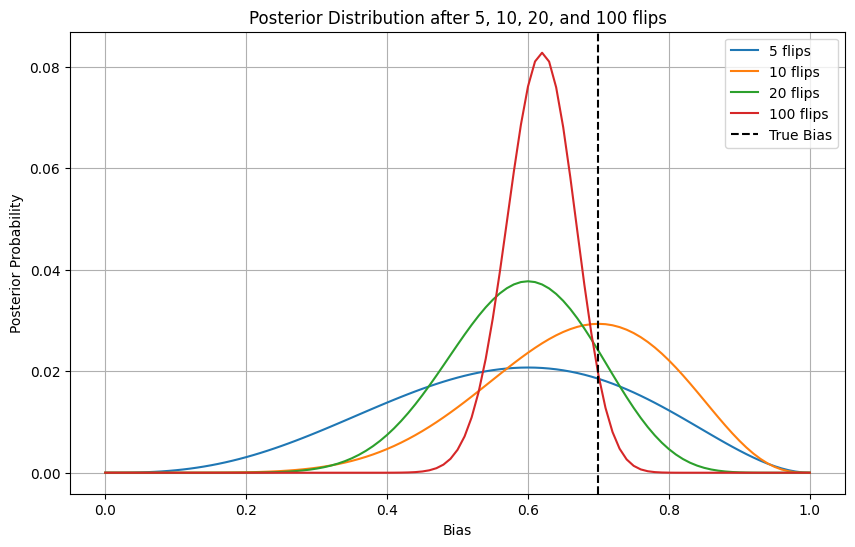

In [6]:
# TODO: Plot posterior distribution after 5, 10, 20 and 100 flips

plt.figure(figsize=(10, 6))

plt.plot(bias_values, posterior_5, label='5 flips')
plt.plot(bias_values, posterior_10, label='10 flips')
plt.plot(bias_values, posterior_20, label='20 flips')
plt.plot(bias_values, posterior_100, label='100 flips')

plt.axvline(true_bias, color='black', linestyle='--', label='True Bias')

plt.xlabel('Bias')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution after 5, 10, 20, and 100 flips')
plt.legend()
plt.grid(True)
plt.show()

### 2.6 Discussion

[1 pt] How does the prior influence the model's in early iterations (with little data) versus later iterations (with more data)?

**Ans**<br>
In early iterations with little data, the prior has a strong influence on the posterior distribution. The posterior will closely resemble the prior shape.

As more data is collected in later iterations, the likelihood from the observed data begins to dominate the calculation, and the influence of the prior weakens. The posterior becomes increasingly concentrated around the true parameter value, regardless of what prior we started with.


[2 pt] Should you take the bet with Steve? Why or why not. Include reasoning drawn from 2.5

**Ans**<br>
No, I should not. After 100 flips, the posterior ditribution, as shown in the plot 2.5, showing that its mean of is close to the true bias(in dash line). This suggests the coin may not be fair, the game is rigged


## 3 Intro: Poisson Likelihood + Gamma Prior -> Gamma Posterior

### Setup
Assume we have $X_1, X_2, \dots, X_n$ independent and identically distributed (i.i.d) Poisson distribution. So, 

$$X_i \sim \text{Pois}(\lambda) \text{ for all } i.$$

You can imagine $x_i$ as counting the number of telephone calls in day $i$, which follows a Poisson distribution, where $\lambda$ is the (unknown) average number of phone calls a day.

**Goal:** We want to conduct Bayesian inference on the data $x_1, \dots, x_n$ in order to infer the unknown parameter $\lambda$.

### a. Likelihood $p(x | \lambda)$
The pmf of Poisson is 

$$p(x | \lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}.$$

Therefore, by i.i.d. assumption, the joint likelihood of all the $n$ pieces of data will be the product of the pmf, simplified for you here
$$p (x_1, \dots, x_n) = \frac{\lambda^{x_1 + \dots  + x_n} e^{-n\lambda}}{x_1! \dots x_n!}.$$

### b. Prior $p(\lambda)$
Remember, we don't know what $\lambda$ is, so we will treat it as a random variable $\Lambda$ (this is capital letter for $\lambda$). Magically, if we let $\Lambda$ follow a Gamma distribution, we get a nice posterior, so we will do just that. Now, the pdf of gamma(shape=$\alpha$, rate=$\beta$) is

$$p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda},$$

where $\Gamma(\cdot)$ is the gamma function. When you choose your prior, **choose any $\alpha >0, \beta>0$ that is suitable for the prior knowledge you have about the data**. See section notes if you feel unfamiliar about it.

_Do not be intimidated by this crazy formula! It will be very friendly to us in the end of the calculation. Question: doesn't the gamma distribution look kind of similar to the Poisson distribution? This may give us a sense that the posterior will be nice! :)_

### c. Posterior $p(\lambda | x)$
We're almost done. 

Recall: The formula of the posterior distribution is
$$
p(\lambda | x) = \frac{p(x|\lambda)p(\lambda)}{\int_{\lambda} \ p(x|\lambda)p(\lambda) \ d\lambda} = \frac{\text{likelihood} \cdot \text{prior}}{\text{normalizing constant}}.
$$
We will skip the algebra and just tell you that 
$$
p(\lambda | x) = \frac{\lambda^{{\color{red}{x_1 + \dots + x_n + \alpha}} - 1} e^{-({\color{red}{n + \beta}})\lambda}}{\text{normalizing constant}}.
$$
The normalizing constant is not very important, the **MAIN TAKEAWAY IS THAT THE POSTERIOR IS ALSO DISTRIBUTED GAMMA! :)** In fact, the posterior is 
$$
\text{gamma}(x_1 + \dots + x_n + \alpha, \ n + \beta).
$$

### Summary
- Likelihood $p(x | \lambda) \sim \text{Pois}(\lambda)$
- Prior $p(\lambda) \sim \text{gamma}(\alpha, \beta)$
- Posterior $p(\lambda | x)\sim \text{gamma}(x_1 + \dots + x_n + \alpha, \ n + \beta)$

With this, you are ready to tackle the first problem.

# 3 Peaked Prior
Run the following code cell.

Let the full data ($n=30$) be
$$
x = [ 8,  8,  7, 11, 10,  6,  7, 11,  5, 12,  8,  7,  8,  8, 11,  4,  3,
        9,  9,  4,  7,  7,  9, 12,  8,  9, 10,  9,  8,  8]
$$
Define:
- ```x```, the original 30 data points
- ```x_short```, only the first 3 data points

In [7]:
import scipy.stats as stats

x = [ 8,  8,  7, 11, 10,  6,  7, 11,  5, 12,  8,  7,  8,  8, 11,  4,  3,  9,  9,  4,  7,  7,  9, 12,  8,  9, 10,  9,  8,  8]
n = len(x)
print('n:', n, '\nmean:', np.mean(x))
x_short = x[:3]
n_short = len(x_short)
print('x_short:', x_short)
print('n_short:', n_short, '\nmean x_short:', np.round(np.mean(x_short),2))

n: 30 
mean: 8.1
x_short: [8, 8, 7]
n_short: 3 
mean x_short: 7.67


## 3.1 Prior

Recall the story about inferring the average number of phone calls. First, we want to create a (peaked) prior that reflects our belief about what the data (number of phone calls) is.     

Suppose Mrs. Morgan said, "From my experience and memory, I think the average number of phone calls every day is 4. Most of the time (like 95% of the time), it's between 2 to 6 calls every day."


**Task:**
1. [2 pt] Define appropriate ```alpha_prior1```, ```beta_prior1``` to obtain a suitable prior gamma($\alpha, \beta$) with appropriate mean and variance. 

    (Hint: for gamma($\alpha, \beta$)
    - mean = $\frac{\alpha}{\beta}$ and variance = $\frac{\alpha}{\beta^2}$. 
    - It may also be easier to define $\beta$ before defining $\alpha$.)
2. [1 pt] Compute ```prior1```, which is the pdf of gamma($\alpha, \beta$) along the $\lambda$-axis `lamb`. 
    - Make sure you read the scipy documentation correctly and input the correct arguments (rate and scale are reciprocals of each other!).
3. [1 pt] Plot the density of the prior.

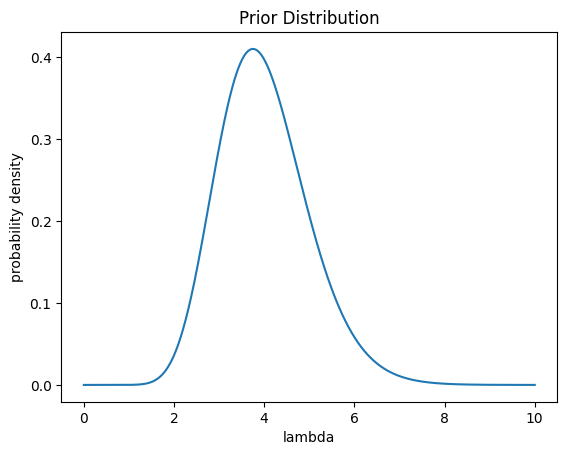

In [8]:
from scipy.stats import gamma

# TODO alpha and beta
# Average number of phone calls is 4
# sigma = 1 => variance = 1
alpha_prior1 = 16
beta_prior1 = 4

# TODO prior1
lamb = np.linspace(0, 10, 1000)
prior1 = gamma.pdf(lamb, alpha_prior1, scale=1/beta_prior1)

# TODO plot
plt.plot(lamb, prior1)
plt.xlabel('lambda')
plt.ylabel('probability density')
plt.title('Prior Distribution')
plt.show()

## 3.2 Posterior parameters
Let the posterior parameters be
- ```alpha_post1```, be the posterior shape for full data ```x```.
- ```beta_post1```, be the posterior rate for full data ```x```.
- ```alpha_post1_short```, be the posterior shape for short data ```x_short```.
- ```beta_post1_short```, be the posterior rate for short data ```x_short```.

**Task:**

[2 pt] Define ```alpha_post1```, ```beta_post1```, ```alpha_post1_short```, and ```beta_post1_short``` using the formula in the introduction.

In [9]:
# TODO alpha, beta

# (a+sum(x_i), b+n)
alpha_post1 = alpha_prior1 + np.sum(x)
beta_post1 = beta_prior1 + len(x)

alpha_post1_short = alpha_prior1 + np.sum(x_short)
beta_post1_short = beta_prior1 + len(x_short)

## 3.3 Posterior plot

**Task:**

1. [2 pt] Define ```posterior1``` and ```posterior1_short```, the respective pdf of the posteriors. 
    - Use the same horizontal axis ```lamb``` from previous parts.
2. [1 pt] Plot the three densities (prior1, posterior1, posterior1_short) on the same figure.

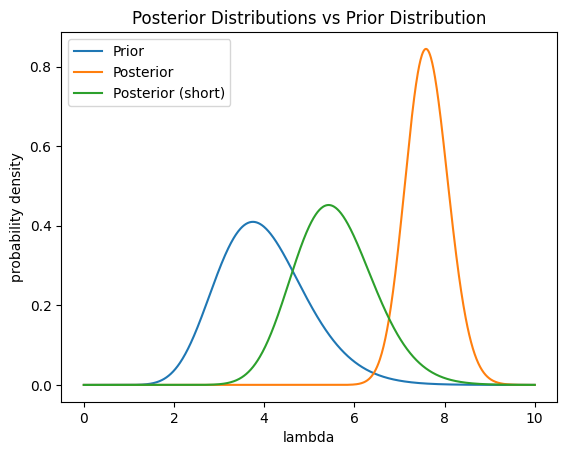

In [10]:
# TODO posterior densities
posterior1 = gamma.pdf(lamb, alpha_post1, scale=1/beta_post1)
posterior1_short = gamma.pdf(lamb, alpha_post1_short, scale=1/beta_post1_short)

# TODO plot
plt.plot(lamb, prior1, label='Prior')
plt.plot(lamb, posterior1, label='Posterior')
plt.plot(lamb, posterior1_short, label='Posterior (short)')
plt.xlabel('lambda')
plt.ylabel('probability density')
plt.title('Posterior Distributions vs Prior Distribution')
plt.legend()
plt.show()

## 3.4 Peaked MAP
**Task:**

1. [1 pt] Compute the MAP estimator for both posteriors, storing it as ```lamb_MAP1``` and ```lamb_MAP1_short```. 

2. [1 pt] Print both these values, rounded to 3 decimal places.

In [11]:
# TODO MAP
lamb_MAP1 = lamb[np.argmax(posterior1)] # find the index with the highest posterior probability
lamb_MAP1_short = lamb[np.argmax(posterior1_short)]

# TODO print
print(np.round(lamb_MAP1, 3))
print(np.round(lamb_MAP1_short, 3))

7.588
5.425


## 3.5 Discuss MAP
[2 pt] What do you observe about the MAP estimator for the full data and short data? Which is "closer" to the prior? Give an explanation for your observations.

**Ans:**<br>
MAP estimator for the short data is closer to the prior. With limited data (x_short), the influence of the prior is relatively stronger in determining the posterior's shape and peak. As more data is observed, the likelihood dominates the posterior, making the MAP estimate to shift away from the prior's peak and toward the maximum likelihood estimate.